# 1. Introduction
* Background: describe about the problem you want to solve, the approaches for
such a problem, etc.
* Objectives: the purposes of your project.

# 2. Methods
* Dataset description: describe the dataset.
* Data exploration and visualization: explore the content of the dataset to better
understand the data.
* Data pre-processing: perform pre-processing and cleaning operations on the
dataset, provide justification for your implementation.
* Model selection: select suitable models for the dataset and provide justification
for your selection. Give brief explanation of how the models work.
* Model training and validation: perform model training and validate the
performance of the models.
* Model tuning and testing: fine tune the models and perform final testing.
# 3. Results and Discussion
* Summarize the training and testing results.
* Perform in-depth analysis of the prediction performance and errors of the models.
* Compare the performance between different models using tables and figures.
* Discuss their strengths and weaknesses.
* Investigate what features are important for the prediction, etc.
# 4. Conclusions
* Summarize what have been done and the findings.

# 1. Introduction
## Background
????
## Objective
Train machine learning models that can accurately predict the cardiovascular risk (low, medium, high) of an individual, using the information provide. The results can be helpful for cardiovascular disease diagnosis and prevention.

# 2. Methods  
The “dataset.csv” dataset consists of 17 features (an individual’s demographic information,
eating habits, physical activities etc.) and one prediction output for three levels of cardiovascular
risk. The data contain certain complexity with missing data and noise. 


# Data Exploration Section

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

ds = pd.read_csv("dataset.csv")
ds.head()

Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
0  Female   42       172.2        82.9             no     low       yes   
1  Female   19       175.3        80.0            yes    none       yes   
2  Female   43       158.3        81.9            yes    none       yes   
3  Female   23       165.0        70.0            yes     low        no   
4    Male   23       169.0        75.0            yes     low       yes   

   Vege_day  Meals_day      Snack Smoking  Water_intake(L) Transportation  \
0         3          3  Sometimes      no             2.72            car   
1         2          1  Sometimes      no             2.65            bus   
2         3          1  Sometimes      no             1.89            car   
3         2          1  Sometimes      no             2.00            bus   
4         3          3  Sometimes      no             2.82            bus   

   Exercise        TV  Income Discipline Cardiovascular_risk(y)  
0         3      rare    2081         no                 medium  
1         3  moderate    5551         no                 medium  
2         1      rare   14046         no                   high  
3         0      rare    9451         no                 medium  
4         1     often   17857         no                 medium

In [2]:
ds.describe()

Age   Height(cm)   Weight(kg)     Vege_day    Meals_day  \
count  2100.000000  2100.000000  2100.000000  2100.000000  2100.000000   
mean     24.302381   170.148286    86.561571     2.423333     2.687143   
std       6.342270     9.340941    26.192242     0.584318     0.810088   
min      14.000000   145.000000    39.000000     1.000000     1.000000   
25%      20.000000   163.000000    65.400000     2.000000     3.000000   
50%      23.000000   170.000000    83.000000     2.000000     3.000000   
75%      26.000000   176.800000   107.250000     3.000000     3.000000   
max      61.000000   198.000000   173.000000     3.000000     4.000000   

       Water_intake(L)     Exercise        Income  
count      2100.000000  2100.000000   2100.000000  
mean          2.007429     1.006190   9432.386190  
std           0.613122     0.894885   5002.350673  
min           1.000000     0.000000   1000.000000  
25%           1.577500     0.000000   4994.500000  
50%           2.000000     1.000000   9226.500000  
75%           2.480000     2.000000  13841.750000  
max           3.000000     3.000000  18000.000000

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height(cm)'}>,
        <Axes: title={'center': 'Weight(kg)'}>],
       [<Axes: title={'center': 'Vege_day'}>,
        <Axes: title={'center': 'Meals_day'}>,
        <Axes: title={'center': 'Water_intake(L)'}>],
       [<Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Income'}>, <Axes: >]], dtype=object)

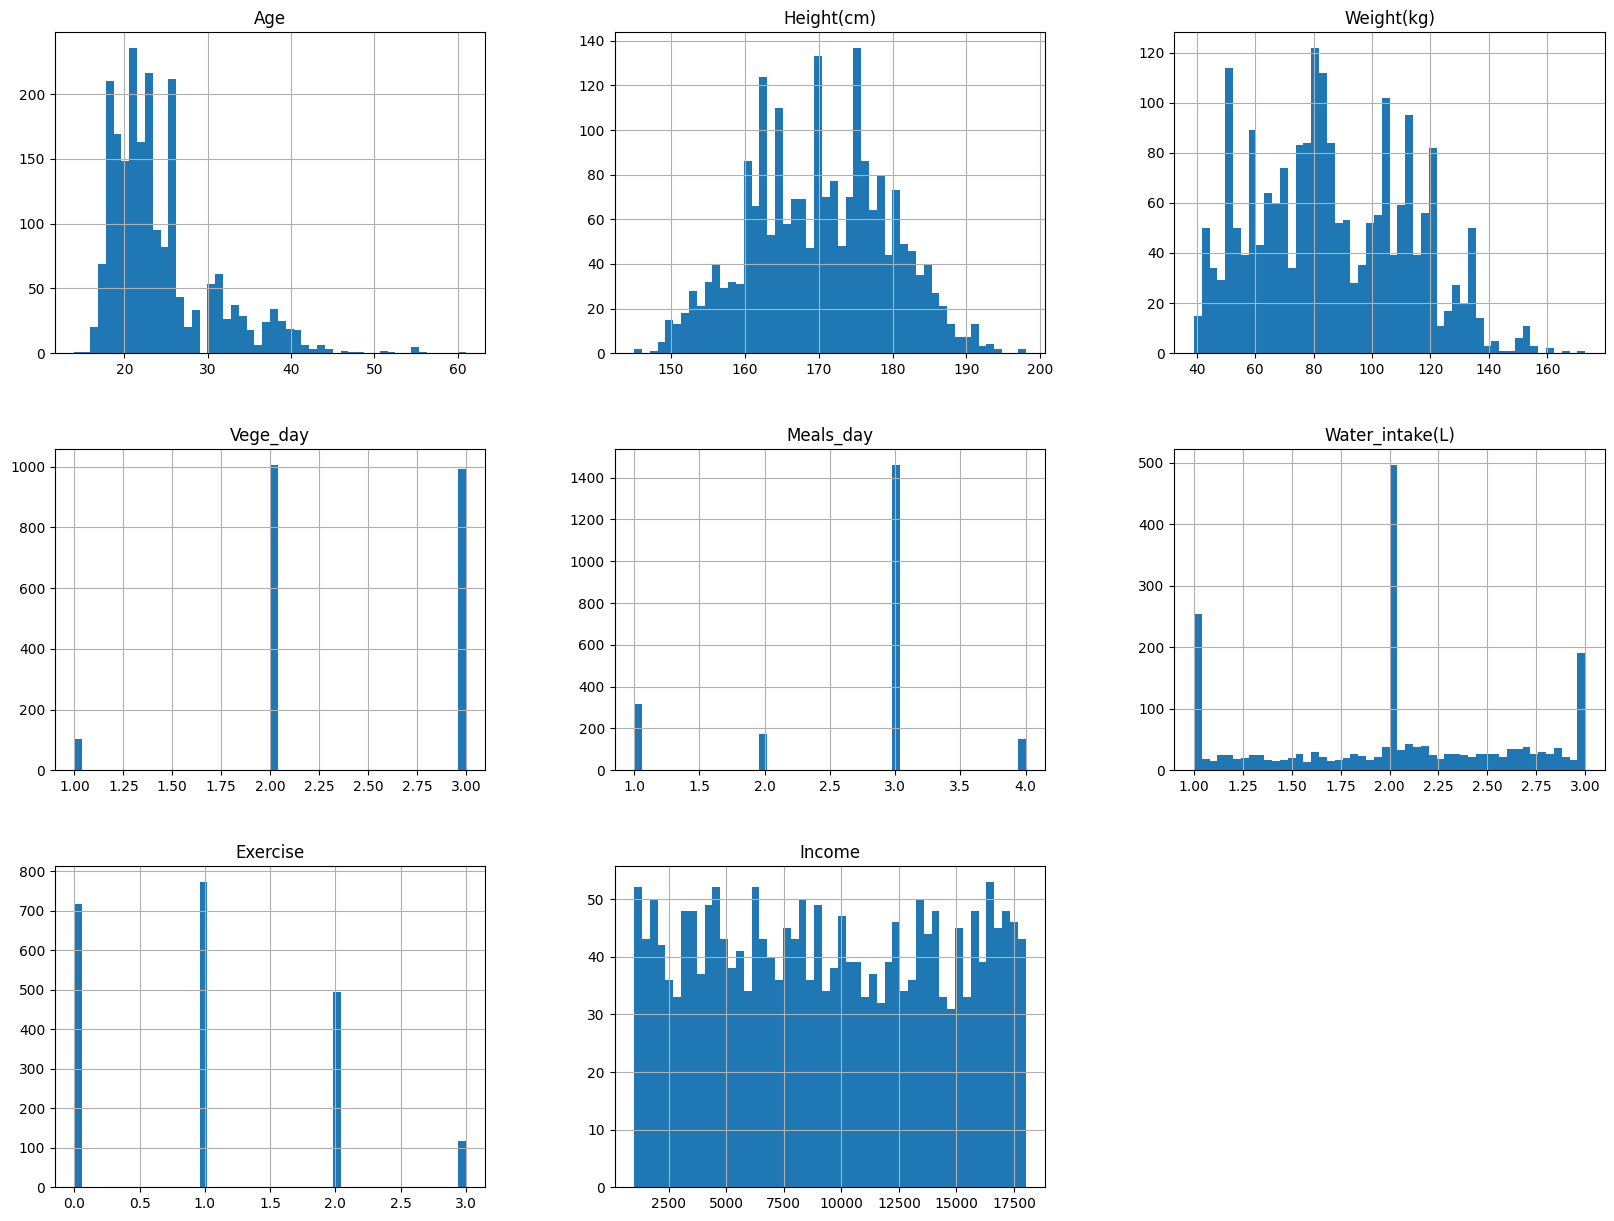

In [3]:
ds.hist(bins = 50, figsize=(20,15))

# Data Preprocessing

Check for null values

In [4]:
ds.isnull().any()

Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [9]:
from sklearn.model_selection import  train_test_split
X = ds.drop('Cardiovascular_risk(y)',axis=1)
y = ds['Cardiovascular_risk(y)']
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=30)
# split the input matrix into numerical and categorical attributes
X_train_num  = X_train.drop(['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline'], axis = 1)
X_train_cat  = X_train[['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline']]

# Fill missing values with median
from sklearn.impute import SimpleImputer   
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train_num)                              # compute the median     
X_train_num_tr = imputer.transform(X_train_num)       # fill up missing values with median value for the feature

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num_tr)       
X_train_num_tr = scaler.transform(X_train_num_tr)

# One-hot encode categorical data
from sklearn.preprocessing import LabelBinarizer
lb_encoder = LabelBinarizer()
for X_train_cat_iter in X_train_cat:
    X_train_cat_val =  X_train_cat[X_train_cat_iter]
    lb_encoder.fit(X_train_cat_val)
    X_train_cat_val_tr = lb_encoder.transform(X_train_cat_val)       # returns numpy array
# combine the transformed numerical and categorical sets
    X_train_tr = np.hstack([X_train_num_tr, X_train_cat_val_tr])
y_train = y_train.values;  #convert to numpy array


X_train_tr shape: (1680, 9)
y_train shape: (1680,)


In [11]:
print('X_train_tr shape:', X_train_tr)
print('y_train shape:', y_train)

X_train_tr shape: [[ 1.04359258 -0.09219031 -0.56171387 ... -0.01921027 -1.6036686
   0.        ]
 [ 0.26068844 -0.45048198  0.96886987 ... -1.1320813   1.49841976
   0.        ]
 [ 0.41726927  0.97182737 -0.12658533 ... -1.1320813   1.58044662
   0.        ]
 ...
 [-0.20905405 -0.23333551  0.1711342  ... -0.01921027  1.69452765
   0.        ]
 [ 0.73043092 -0.6459138   0.10624661 ... -1.1320813   1.28061059
   0.        ]
 [ 0.88701175  1.18897384  0.23983871 ... -1.1320813   0.02512191
   0.        ]]
y_train shape: ['medium' 'high' 'medium' ... 'high' 'high' 'medium']




## Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# split the input matrix into numerical and categorical attributes
X_train_num  = X_train.drop(['Gender','Family_history',Alcohol,Junk_food,Snack,Smoking,Transportation,TV,Discipline], axis = 1)
X_train_cat  = X_train['Gender','Family_history',Alcohol,Junk_food,Snack,Smoking,Transportation,TV,Discipline]

# Fill missing values with median
from sklearn.impute import SimpleImputer   
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train_num)                              # compute the median     
X_train_num_tr = imputer.transform(X_train_num)       # fill up missing values with median value for the feature

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num_tr)       
X_train_num_tr = scaler.transform(X_train_num_tr)

# One-hot encode categorical data
from sklearn.preprocessing import LabelBinarizer
lb_encoder = LabelBinarizer()
lb_encoder.fit(X_train_cat)
X_train_cat_tr = lb_encoder.transform(X_train_cat)       # returns numpy array

# combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr])
y_train = y_train.values;  #convert to numpy array
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)